Group Member:

1. Din Mohammad Dohan ID: 23366012
2. Sudipta Mondal ID: 23366020
3. Abu Sufian ID: 23366011
4. Md. Rashedul Islam ID: 23166002

## <center> Flight Fare Predictions Using Machine Learning Algorithms
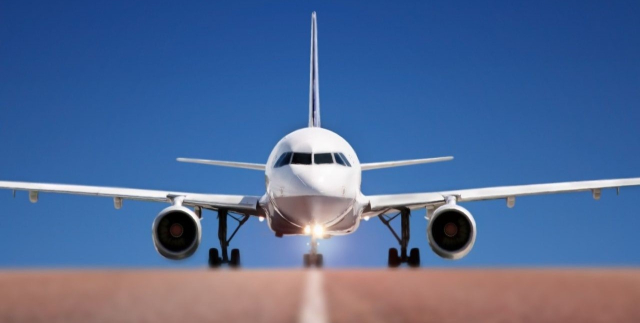

This project is covered in this following step:

Step 1: Importing Libraries and Download the Data

Step 2: Exploratory Data Analysis (EDA) and Visualization

*   Data Exploring
*   Data Cleaning
*   Percentage of Missing values
*   Identify and Drop NaN/Null values
*   Identify and Drop Duplicate values
*   Data Preprocessing
*   Extracting Date Time
*   Visualization

Step 3 - Prepare the Dataset for Training

*   Identify Numeric columns
*   Identify Categorical columns
*   Identify Input columns
*   Identify Target columns
*   Correlation graph for Input columns
*   Feature Transformation Process
*   Scale Numeric values with MinMaxScaler
*   Encode Categorical Columns with OneHotEncoding
*   Train Test Split with 80-20

Step 4: Building Regressor Model and Evaluation Performance

    1.   Decision Tree
    2.   Random Forest
    3.   K Nearest Neighbors (KNN)
    4.   Naive Bayes (NB)


*   Find out Best Model (Random Forest r2 score: 0.8088)
*   Actual and Predicted values
*   Feature Importance
*   Hyperameter Tuning for Model Improvement
*   Model Evaluation with r2 score, MAE, MSE and RMSE values

    LIME with Random Forest Model (Explaining the predictions of machine learning models)

  Applying PCA for feature extraction

## Step 1: Importing Libraries and Download the Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
!pip install scikit-learn --upgrade --quiet

In [6]:
!pip install opendatasets --upgrade --quiet

In [7]:
# import opendatasets as od

In [8]:
# od.version()

In [9]:
# dataset_url = 'https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh'

In [10]:
# od.download(dataset_url)

In [11]:
# import os

In [12]:
# data_dir = './flight-fare-prediction-mh'

In [13]:
# os.listdir(data_dir)

In [14]:
# test_df =data_dir +'/Test_set.xlsx'

In [15]:
#test data

In [16]:
test_df1 = pd.read_excel('Test_set.xlsx')
test_df1.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


In [17]:
# train_df = data_dir + '/Data_Train.xlsx'

In [18]:
df = pd.read_excel('Data_Train.xlsx')
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


## Step 2: Exploratory Data Analysis (EDA) and Visualization

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [20]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [21]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [22]:
df.shape # with duplicate values

(10683, 11)

In [23]:
missing_values_count = df.isnull().sum()
missing_values_count

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Percentage of Missing values

In [24]:
# how many total missing values does it have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0017019393599006067


Drop NaN/Null values

In [25]:
#drop the nullvalues
df.dropna(inplace=True)

Identify and Drop Duplicate values

In [26]:
df[df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [27]:
df.drop_duplicates(keep='first',inplace=True)

In [28]:
df.shape # without duplicate values

(10462, 11)

In [29]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

*The* datatypes of `Date_of_journey`, `Arrival_Time` and `Dep_Time` are object here. So at fist, need to convert it to `to_datetime` for proper predicion.

In [30]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [31]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [32]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

D:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

In [33]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [34]:
df.value_counts()

Airline                  Date_of_Journey  Source    Destination  Route                  Dep_Time             Arrival_Time         Duration  Total_Stops  Additional_Info              Price
Air Asia                 2019-01-03       Banglore  New Delhi    BLR → DEL              2024-09-10 05:50:00  2024-09-10 08:40:00  2h 50m    non-stop     No info                      10715    1
Jet Airways              2019-06-27       Delhi     Cochin       DEL → IDR → BOM → COK  2024-09-10 09:35:00  2024-06-28 12:35:00  27h       2 stops      No info                      13292    1
                                                                 DEL → BOM → COK        2024-09-10 19:15:00  2024-06-28 12:35:00  17h 20m   1 stop       In-flight meal not included  10262    1
                                                                                                             2024-06-28 19:00:00  23h 45m   1 stop       In-flight meal not included  10262    1
                                        

In [35]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month
df.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-09-10 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-09-10 05:50:00,2024-09-10 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-09-10 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2024-09-10 18:05:00,2024-09-10 23:30:00,5h 25m,1 stop,No info,6218,5,12


In [36]:
df.drop('Date_of_Journey', axis=1, inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-09-10 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-09-10 05:50:00,2024-09-10 13:15:00,7h 25m,2 stops,No info,7662,5,1


Extracing Time

In [37]:
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour

def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [38]:
extract_hour(df,'Dep_Time')
extract_min(df,'Dep_Time')

In [39]:
extract_hour(df,'Arrival_Time')
extract_min(df,'Arrival_Time')

In [40]:
df.drop(['Dep_Time','Arrival_Time'], axis=1, inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


In [41]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25


In [42]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [43]:
df['Duration']=duration
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25


In [44]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [45]:
df['dur_hour']=df['Duration'].apply(hour)

In [46]:
df['dur_min']=df['Duration'].apply(minutes)

In [47]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0


In [48]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Duration             object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour             object
dur_min              object
dtype: object

In [49]:
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

In [50]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Duration             object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour              int32
dur_min               int32
dtype: object

Source vs Price visualization with bar plot

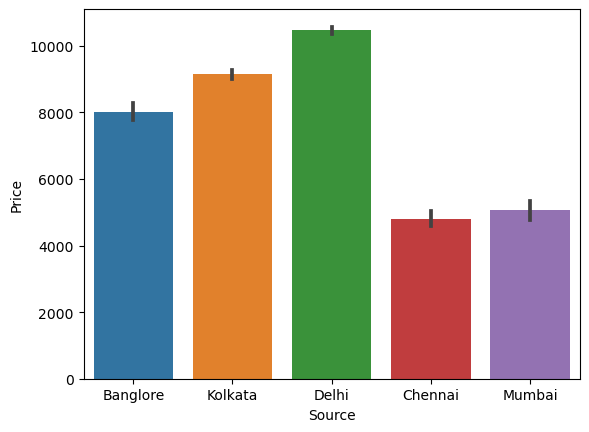

In [51]:
sns.barplot(data=df, x='Source', y='Price');

In [52]:
df.nunique()

Airline                12
Source                  5
Destination             6
Route                 128
Duration              368
Total_Stops             5
Additional_Info        10
Price                1870
journey_day             9
journey_month           7
Dep_Time_hour          24
Dep_Time_min           12
Arrival_Time_hour      24
Arrival_Time_min       12
dur_hour               44
dur_min                12
dtype: int64

In [53]:
for i in df.columns:
    print('{} contains {} classes'.format(i,len(df[i].value_counts())))

Airline contains 12 classes
Source contains 5 classes
Destination contains 6 classes
Route contains 128 classes
Duration contains 368 classes
Total_Stops contains 5 classes
Additional_Info contains 10 classes
Price contains 1870 classes
journey_day contains 9 classes
journey_month contains 7 classes
Dep_Time_hour contains 24 classes
Dep_Time_min contains 12 classes
Arrival_Time_hour contains 24 classes
Arrival_Time_min contains 12 classes
dur_hour contains 44 classes
dur_min contains 12 classes


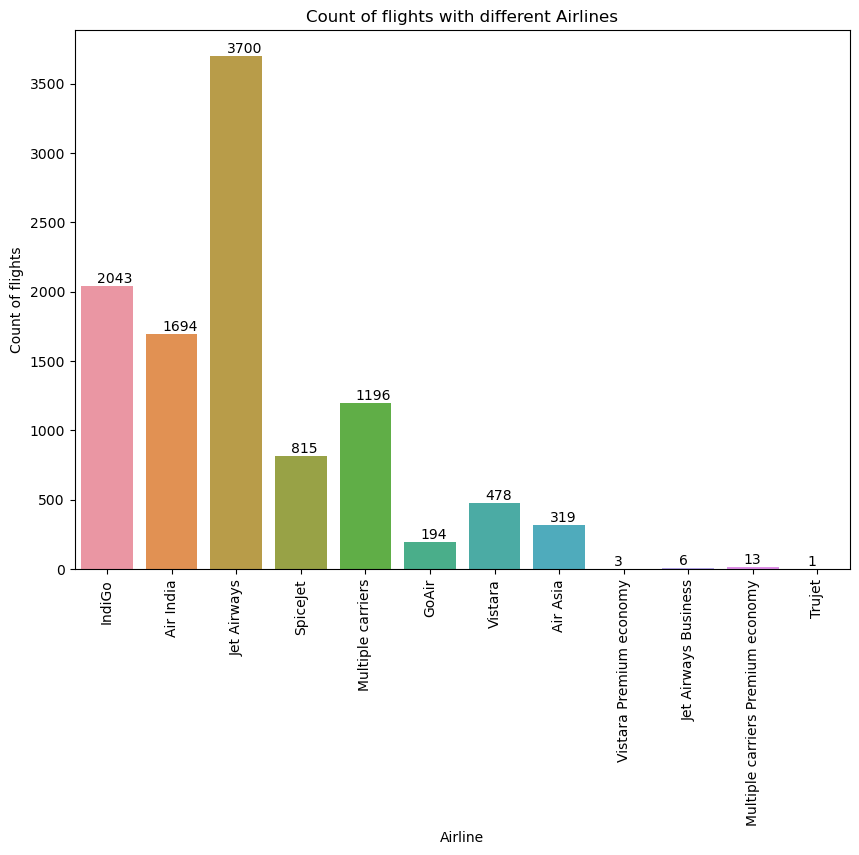

In [54]:
plt.figure(figsize = (10, 7))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [55]:
df.groupby('Source').sum()

,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
Source,,,,,,,,,
Banglore,17481840,25360,11273,27022,59385,28318,60225,12365,78300
Chennai,1824949,5045,2020,4590,11795,4885,8410,762,7475
Delhi,45455655,59766,24130,50520,97515,58125,89460,55681,108345
Kolkata,26149219,33436,16746,39974,67750,40036,79780,34174,82110
Mumbai,3526617,8529,3734,8444,18880,8698,20745,1912,18905


In [56]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Duration             object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour              int32
dur_min               int32
dtype: object

## Step 3 - Prepare the Dataset for Training

In [57]:
model_df = df.loc[:,["Airline","Source","Destination","Total_Stops","journey_day","journey_month",
                     "Dep_Time_hour","Dep_Time_min","Arrival_Time_hour","Arrival_Time_min","Price"]]
model_df

,Airline,Source,Destination,Total_Stops,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Price
0,IndiGo,Banglore,New Delhi,non-stop,24,3,22,20,1,10,3897
1,Air India,Kolkata,Banglore,2 stops,5,1,5,50,13,15,7662
2,Jet Airways,Delhi,Cochin,2 stops,6,9,9,25,4,25,13882
3,IndiGo,Kolkata,Banglore,1 stop,5,12,18,5,23,30,6218
4,IndiGo,Banglore,New Delhi,1 stop,3,1,16,50,21,35,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4,9,19,55,22,25,4107
10679,Air India,Kolkata,Banglore,non-stop,27,4,20,45,23,20,4145
10680,Jet Airways,Banglore,Delhi,non-stop,27,4,8,20,11,20,7229
10681,Vistara,Banglore,New Delhi,non-stop,3,1,11,30,14,10,12648


In [58]:
model_df.shape

(10462, 11)

Identify Input and Target columns

In [59]:
X= model_df.drop(columns=['Price']) # Input columns
y= model_df['Price'] # Target coulumn

In [60]:
X.head(3)

,Airline,Source,Destination,Total_Stops,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,non-stop,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,6,9,9,25,4,25


In [61]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10462, dtype: int64

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10462 non-null  object
 1   Source             10462 non-null  object
 2   Destination        10462 non-null  object
 3   Total_Stops        10462 non-null  object
 4   journey_day        10462 non-null  int64 
 5   journey_month      10462 non-null  int64 
 6   Dep_Time_hour      10462 non-null  int64 
 7   Dep_Time_min       10462 non-null  int64 
 8   Arrival_Time_hour  10462 non-null  int64 
 9   Arrival_Time_min   10462 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 899.1+ KB


Identify Numeric and Categorical columns

In [63]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

['journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min']

In [64]:
categorical_cols = X.select_dtypes('object').columns.tolist()
categorical_cols

['Airline', 'Source', 'Destination', 'Total_Stops']

 Features Transformation and Scaling - MinMaxScaler, OneHotEncoding

Scale Numeric values

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()

In [67]:
scaler.fit(model_df[numeric_cols])

MinMaxScaler()

In [68]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[3.0, 1.0, 0.0, 0.0, 0.0, 0.0]

In [69]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[27.0, 12.0, 23.0, 55.0, 23.0, 55.0]

In [70]:
model_df[numeric_cols].describe().loc[['min', 'max']]

,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
min,3.0,1.0,0.0,0.0,0.0,0.0
max,27.0,12.0,23.0,55.0,23.0,55.0


In [71]:
X[numeric_cols] = scaler.transform(X[numeric_cols])
X[numeric_cols].describe()

,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
count,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,0.401254,0.412236,0.542543,0.443727,0.582073,0.449453
std,0.366318,0.272304,0.249010,0.342104,0.298067,0.301281
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.083333,0.181818,0.347826,0.090909,0.347826,0.181818
50%,0.125000,0.363636,0.478261,0.454545,0.608696,0.454545
75%,0.750000,0.454545,0.782609,0.727273,0.826087,0.636364
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
model_df[categorical_cols].nunique()

Airline        12
Source          5
Destination     6
Total_Stops     5
dtype: int64

Encode Categorical columns

In [73]:
from sklearn.preprocessing import OneHotEncoder

In [74]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [75]:
encoder.fit(model_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [76]:
encoder.categories_

[array(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
        'Jet Airways Business', 'Multiple carriers',
        'Multiple carriers Premium economy', 'SpiceJet', 'Trujet',
        'Vistara', 'Vistara Premium economy'], dtype=object),
 array(['Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'], dtype=object),
 array(['Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
       dtype=object),
 array(['1 stop', '2 stops', '3 stops', '4 stops', 'non-stop'],
       dtype=object)]

In [77]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi', 'Total_Stops_1 stop', 'Total_Stops_2 stops', 'Total_Stops_3 stops', 'Total_Stops_4 stops', 'Total_Stops_non-stop']


In [78]:
X

,Airline,Source,Destination,Total_Stops,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,non-stop,0.875000,0.181818,0.956522,0.363636,0.043478,0.181818
1,Air India,Kolkata,Banglore,2 stops,0.083333,0.000000,0.217391,0.909091,0.565217,0.272727
2,Jet Airways,Delhi,Cochin,2 stops,0.125000,0.727273,0.391304,0.454545,0.173913,0.454545
3,IndiGo,Kolkata,Banglore,1 stop,0.083333,1.000000,0.782609,0.090909,1.000000,0.545455
4,IndiGo,Banglore,New Delhi,1 stop,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,0.041667,0.727273,0.826087,1.000000,0.956522,0.454545
10679,Air India,Kolkata,Banglore,non-stop,1.000000,0.272727,0.869565,0.818182,1.000000,0.363636
10680,Jet Airways,Banglore,Delhi,non-stop,1.000000,0.272727,0.347826,0.363636,0.478261,0.363636
10681,Vistara,Banglore,New Delhi,non-stop,0.000000,0.000000,0.478261,0.545455,0.608696,0.181818


In [79]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10462, dtype: int64

In [80]:
X[encoded_cols] = encoder.transform(X[categorical_cols])

In [81]:
X_train = X[numeric_cols + encoded_cols]
X_test= X[numeric_cols + encoded_cols]

**Train Test Split:**
*   Training set 80%
*   Testing  set 20%

In [82]:
X_train.shape, X_test.shape

((10462, 34), (10462, 34))

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [84]:
print('X_train.shape :', X_train.shape)
print('X_test.shape :', X_test.shape)
print('y_train.shape :', y_train.shape)
print('y_test.shape :', y_test.shape)

X_train.shape : (8369, 38)
X_test.shape : (2093, 38)
y_train.shape : (8369,)
y_test.shape : (2093,)


In [85]:
X_train.head(3)

,Airline,Source,Destination,Total_Stops,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
8500,Jet Airways,Banglore,New Delhi,1 stop,0.625,0.181818,0.608696,0.090909,0.826087,0.181818,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4612,Multiple carriers,Delhi,Cochin,1 stop,1.000,0.181818,0.086957,0.272727,0.565217,0.363636,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10252,Vistara,Delhi,Cochin,non-stop,0.125,0.454545,0.260870,0.000000,0.391304,0.181818,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [86]:
y_train.head(3)

8500     14815
4612     12327
10252     6216
Name: Price, dtype: int64

In [87]:
X_train.shape

(8369, 38)

In [88]:
model_df.Airline.value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [89]:
model_df.Total_Stops.value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [90]:
X.isna().sum()

Airline                                      0
Source                                       0
Destination                                  0
Total_Stops                                  0
journey_day                                  0
journey_month                                0
Dep_Time_hour                                0
Dep_Time_min                                 0
Arrival_Time_hour                            0
Arrival_Time_min                             0
Airline_Air Asia                             0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vista

Correlation Graph for Model

In [91]:
model_df.corr()

,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Price
journey_day,1.000000,-0.265200,-0.007617,-0.013512,-0.001133,-0.019622,-0.171142
journey_month,-0.265200,1.000000,0.028462,0.001922,-0.003041,-0.023619,0.008662
Dep_Time_hour,-0.007617,0.028462,1.000000,-0.015068,-0.003827,0.072989,0.005155
Dep_Time_min,-0.013512,0.001922,-0.015068,1.000000,0.046564,-0.021353,-0.024155
Arrival_Time_hour,-0.001133,-0.003041,-0.003827,0.046564,1.000000,-0.152036,0.031023
Arrival_Time_min,-0.019622,-0.023619,0.072989,-0.021353,-0.152036,1.000000,-0.086163
Price,-0.171142,0.008662,0.005155,-0.024155,0.031023,-0.086163,1.000000


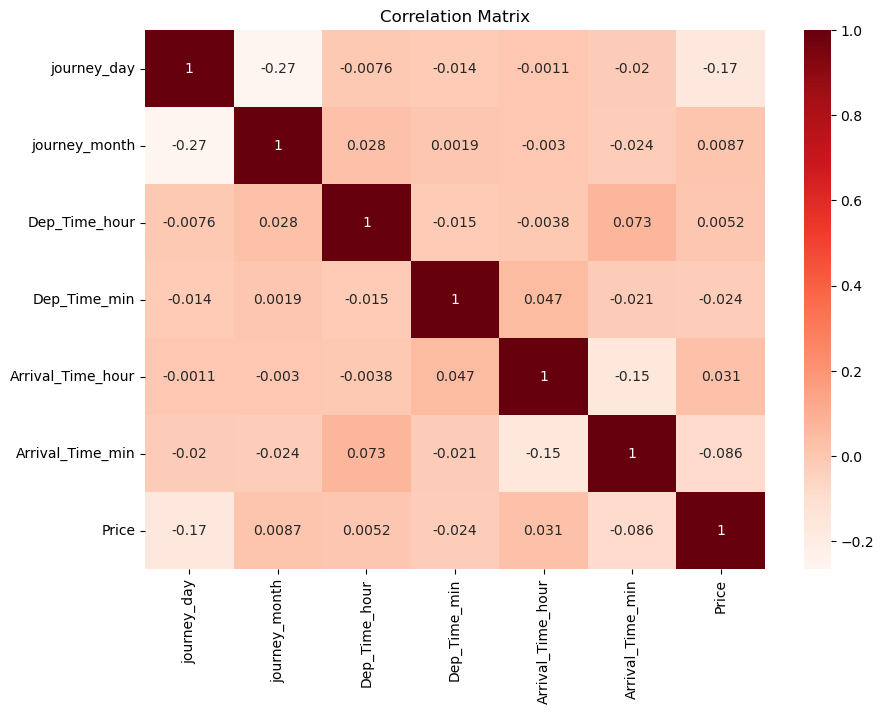

In [92]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(model_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

Step 4: Building Some Regressor Model and Evaluation Performance

In [93]:
X_train = X_train[numeric_cols + encoded_cols]
X_test = X_test[numeric_cols + encoded_cols]

In [94]:
X_train.shape, X_test.shape

((8369, 34), (2093, 34))

In [95]:
X_train.head(4)

,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
8500,0.625,0.181818,0.608696,0.090909,0.826087,0.181818,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4612,1.000,0.181818,0.086957,0.272727,0.565217,0.363636,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10252,0.125,0.454545,0.260870,0.000000,0.391304,0.181818,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6830,0.000,0.454545,0.956522,0.909091,0.043478,0.363636,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [96]:
X_test.head(4)

,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
2932,0.041667,1.000000,0.260870,0.181818,0.347826,1.000000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7709,0.041667,0.727273,0.652174,0.272727,0.739130,0.818182,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1374,0.750000,0.363636,0.565217,0.000000,0.913043,0.000000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10388,0.500000,0.454545,0.565217,0.272727,0.608696,0.818182,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [97]:
# import necessary modules
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# call a function named 'ml_model' which will call all Regressor model
def predict(ml_model):

    # Define Models Name
    print('Model: {}'.format(ml_model))

    # fit all models with data
    model= ml_model.fit(X_train,y_train)

    # Model Training Score
    print("Training score: {}".format(model.score(X_train,y_train)))

    # Model Predictions
    predictions = model.predict(X_test)

    # Define r2 score for Regressor Model
    r2score=r2_score(y_test,predictions)
    print("r2 score: {}".format(r2score))

    # Model Evoluation with MAE, MSE, RMSE
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

In [98]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB

In [99]:
predict(DecisionTreeRegressor(random_state=42))

Model: DecisionTreeRegressor(random_state=42)
Training score: 0.9699345905444802
r2 score: 0.71507742104844
MAE:1346.697762382545
MSE:6479134.197838696
RMSE:2545.4143469853184


In [100]:
predict(RandomForestRegressor(random_state=42))

Model: RandomForestRegressor(random_state=42)
Training score: 0.9539371395086506
r2 score: 0.8039588698017761
MAE:1201.9171778583736
MSE:4457971.690148869
RMSE:2111.3909373085953


In [101]:
predict(KNeighborsRegressor())

Model: KNeighborsRegressor()
Training score: 0.8206571587119321
r2 score: 0.7371664222631229
MAE:1528.8583850931677
MSE:5976830.717037744
RMSE:2444.7557581561687


In [102]:
predict(GaussianNB())

Model: GaussianNB()
Training score: 0.43720874656470304
r2 score: 0.6222826551068578
MAE:1631.5771619684663
MSE:8589285.466316292
RMSE:2930.748277542152


Model Improvement

In [103]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42, n_estimators=400)
rf_model.fit(X_train, y_train)

# Model Predictions
predictions = rf_model.predict(X_test)

# Define r2 score for rf Model
r2score=r2_score(y_test,predictions)
print("r2 score: {}".format(r2score))

r2 score: 0.8059070287290969


r2 score is little bit increased than previous result

In [104]:
test_preds = rf_model.predict(X_test)
test_preds

array([ 5275.8225    ,  4186.855     ,  9023.87058333, ...,
       11094.6215    ,  9800.165     , 11611.69695833])

In [105]:
test_probs = rf_model.predict(X_test)
test_probs

array([ 5275.8225    ,  4186.855     ,  9023.87058333, ...,
       11094.6215    ,  9800.165     , 11611.69695833])

In [106]:
y_pred = rf_model.predict(X_test)

Actual vs Predicted values



In [107]:
pred_y = pd.DataFrame({'actual_value': y_test, 'predicted_value': y_pred, 'Difference': y_test-y_pred})
pred_y[:20]

,actual_value,predicted_value,Difference
2932,5911,5275.822500,635.177500
7709,4174,4186.855000,-12.855000
1374,14067,9023.870583,5043.129417
10388,2017,2050.257143,-33.257143
6333,6582,5612.556667,969.443333
1785,26890,27002.405000,-112.405000
1866,13381,13142.325000,238.675000
213,7677,8529.247571,-852.247571
6215,5162,5636.177500,-474.177500
4561,10844,10654.519208,189.480792


Feature Importance Analysis (Random Forest Regressor)

                 feature  importance
9     Total_Stops_1 stop    0.649638
1       Airline_Air Asia    0.123937
2      Airline_Air India    0.093236
0       Arrival_Time_min    0.051210
7      Destination_Delhi    0.045108
3    Airline_Jet Airways    0.020442
4        Airline_Vistara    0.006315
5           Source_Delhi    0.005788
8  Destination_Hyderabad    0.002213
6         Source_Kolkata    0.002112


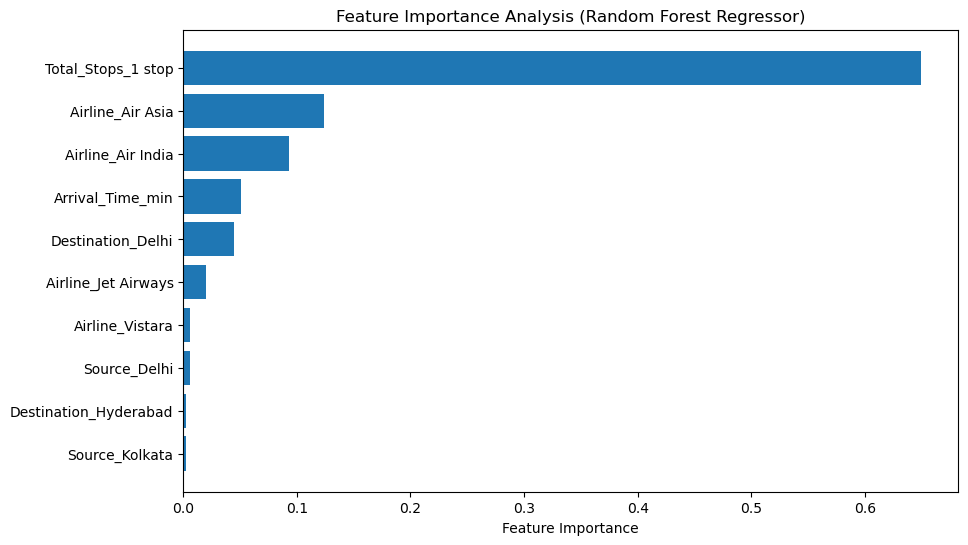

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

# Feature scaling (optional but can help with some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature selection (optional)
# You can use feature selection techniques to choose the most important features
# Here, we'll use SelectKBest with f_regression to select the top k features.
k_best = SelectKBest(score_func=f_regression, k=10)  # Select the top 10 features based on scores
X_train_selected = k_best.fit_transform(X_train_scaled, y_train)
X_test_selected = k_best.transform(X_test_scaled)

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Get the corresponding feature names
selected_feature_names = X.columns[selected_feature_indices]

# Create and train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_selected, y_train)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame with feature importances
importance_df = pd.DataFrame({
    'feature': selected_feature_names,
    'importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values('importance', ascending=False)

# Print feature importances
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Analysis (Random Forest Regressor)')
plt.gca().invert_yaxis()
plt.show()


LIME with Random Forest Model (Explaining the predictions of machine learning models)

In [ ]:
# !pip install lime

In [113]:
X_test.iloc[0]

journey_day                                  0.041667
journey_month                                1.000000
Dep_Time_hour                                0.260870
Dep_Time_min                                 0.181818
Arrival_Time_hour                            0.347826
Arrival_Time_min                             1.000000
Airline_Air Asia                             0.000000
Airline_Air India                            1.000000
Airline_GoAir                                0.000000
Airline_IndiGo                               0.000000
Airline_Jet Airways                          0.000000
Airline_Jet Airways Business                 0.000000
Airline_Multiple carriers                    0.000000
Airline_Multiple carriers Premium economy    0.000000
Airline_SpiceJet                             0.000000
Airline_Trujet                               0.000000
Airline_Vistara                              0.000000
Airline_Vistara Premium economy              0.000000
Source_Banglore             

In [145]:
X_train.shape, X_test.shape

((8369, 34), (2093, 34))

Applying PCA for feature extraction

In [148]:
from sklearn.decomposition import PCA

# Standardize the feature matrix (important for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Apply PCA for feature extraction
n_components = 6  # You can choose the desired number of components
pca = PCA(n_components = n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame to visualize the principal components
pca_df = pd.DataFrame(data=X_pca, columns=[f"PC{i+1}" for i in range(n_components)])

# Optional: Display the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Create and train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_pca, y_train)

# Standardize the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Apply PCA to the test data
X_test_pca = pca.transform(X_test_scaled)

# Make predictions on the test data
y_pred = rf_model.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Explained Variance Ratio: [0.13182124 0.09509149 0.0731222  0.06793776 0.05542446 0.04772341]
Mean Squared Error: 6093324.5079
R-squared: 0.7320


In [149]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.319048,0.025335,2.825373,-0.208001,-1.328804,2.608392
1,3.011929,-1.413987,-0.262155,-0.337604,-0.943083,-1.291052
2,0.386258,-1.416024,-0.177603,-0.366644,0.025530,-1.381802
3,-2.121160,2.315449,-0.362334,-0.302796,0.413163,-1.347414
4,-2.843520,-2.128172,1.853337,-0.361496,0.013339,-2.647699


In [150]:
X_test_pca.shape

(2093, 6)

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import lime
import lime.lime_tabular

# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_test_pca, mode="regression")

# Choose a specific instance from the test set for explanation
instance_to_explain = X_test_pca[466]

# Explain the Random Forest Regressor's prediction for the chosen instance
explanation = explainer.explain_instance(instance_to_explain, rf_model.predict)

# Print the explanation
explanation.show_in_notebook()